In [1]:
import optuna

study = optuna.load_study(
    study_name="lgbm_study",
    storage="sqlite:///optuna_lgbm.db"
)
print("✅ Study 로드 완료")

C:\Users\tori\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Study 로드 완료


In [2]:
import pandas as pd

df = study.trials_dataframe()
print("전체 trial 수:", len(df))
df.head()

전체 trial 수: 1013


,number,value,datetime_start,datetime_complete,duration,params_bagging_fraction,params_bagging_freq,params_feature_fraction,params_learning_rate,params_max_depth,params_min_child_samples,params_num_leaves,params_reg_alpha,params_reg_lambda,state
0,0,NaN,2025-07-24 16:19:52.825630,2025-07-24 16:19:56.249690,0 days 00:00:03.424060,0.637663,2,0.657675,0.259007,5,88,70,4.723041,2.234153,FAIL
1,1,0.001634,2025-07-24 16:20:27.116683,2025-07-24 16:20:28.031949,0 days 00:00:00.915266,0.990165,1,0.723507,0.119445,12,32,87,2.738328,3.223924,COMPLETE
2,2,0.003268,2025-07-24 16:20:28.310165,2025-07-24 16:20:29.914445,0 days 00:00:01.604280,0.813612,6,0.768648,0.036881,4,66,57,3.745353,4.102656,COMPLETE
3,3,0.001634,2025-07-24 16:20:29.940883,2025-07-24 16:20:30.442329,0 days 00:00:00.501446,0.701349,4,0.755924,0.228184,10,24,31,2.387034,4.674951,COMPLETE
4,4,0.000000,2025-07-24 16:20:30.469462,2025-07-24 16:20:30.801367,0 days 00:00:00.331905,0.719492,8,0.815225,0.091387,12,50,110,1.038949,1.480013,COMPLETE


In [3]:
df["accuracy"] = 1.0 - df["value"]
df_sorted = df.sort_values("accuracy", ascending=False)
df_sorted.head(5)

,number,value,datetime_start,datetime_complete,duration,params_bagging_fraction,params_bagging_freq,params_feature_fraction,params_learning_rate,params_max_depth,params_min_child_samples,params_num_leaves,params_reg_alpha,params_reg_lambda,state,accuracy
4,4,0.0,2025-07-24 16:20:30.469462,2025-07-24 16:20:30.801367,0 days 00:00:00.331905,0.719492,8,0.815225,0.091387,12,50,110,1.038949,1.480013,COMPLETE,1.0
7,7,0.0,2025-07-24 16:20:31.647101,2025-07-24 16:20:33.126220,0 days 00:00:01.479119,0.938865,10,0.772711,0.174134,3,71,43,0.812988,1.849129,COMPLETE,1.0
10,10,0.0,2025-07-24 16:20:34.320859,2025-07-24 16:20:34.763809,0 days 00:00:00.442950,0.928941,6,0.619055,0.199229,11,36,33,0.122844,2.756397,COMPLETE,1.0
995,995,0.0,2025-07-24 16:52:24.888134,2025-07-24 16:52:25.701693,0 days 00:00:00.813559,0.930656,9,0.746991,0.091696,3,81,126,0.186707,1.494892,COMPLETE,1.0
994,994,0.0,2025-07-24 16:52:24.270762,2025-07-24 16:52:24.842454,0 days 00:00:00.571692,0.900944,8,0.789634,0.292681,12,50,47,0.484565,2.225910,COMPLETE,1.0


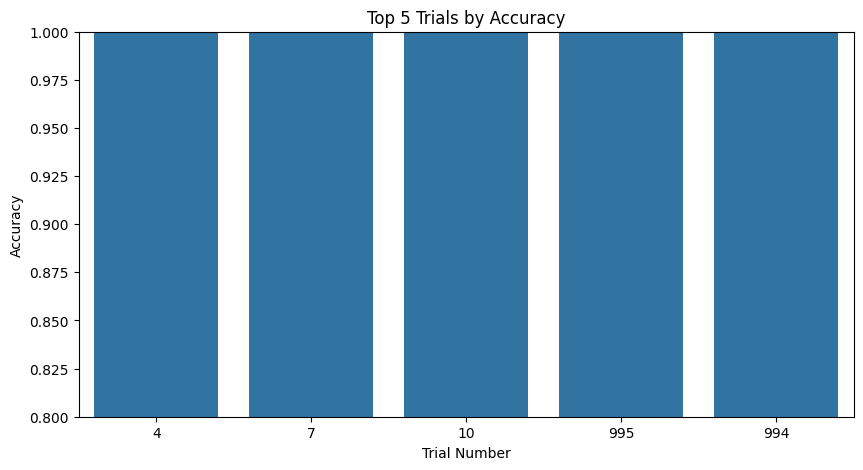

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

top5 = df_sorted.head()
plt.figure(figsize=(10, 5))
sns.barplot(x=top5["number"].astype(str), y=top5["accuracy"])
plt.title("Top 5 Trials by Accuracy")
plt.xlabel("Trial Number")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.show()

In [5]:
# 📊 간이 파라미터 중요도 분석 (정확도와 상관관계)
param_cols = [c for c in df.columns if c.startswith("params_")]
correlations = df[param_cols + ["accuracy"]].corr()["accuracy"].drop("accuracy").sort_values(key=abs, ascending=False)
correlations.to_frame("Pearson Correlation with Accuracy")

,Pearson Correlation with Accuracy
params_reg_alpha,-0.615341
params_min_child_samples,0.182732
params_learning_rate,-0.155248
params_bagging_fraction,0.130437
params_feature_fraction,-0.097295
params_bagging_freq,0.066036
params_max_depth,-0.019127
params_reg_lambda,0.014122
params_num_leaves,-0.009734


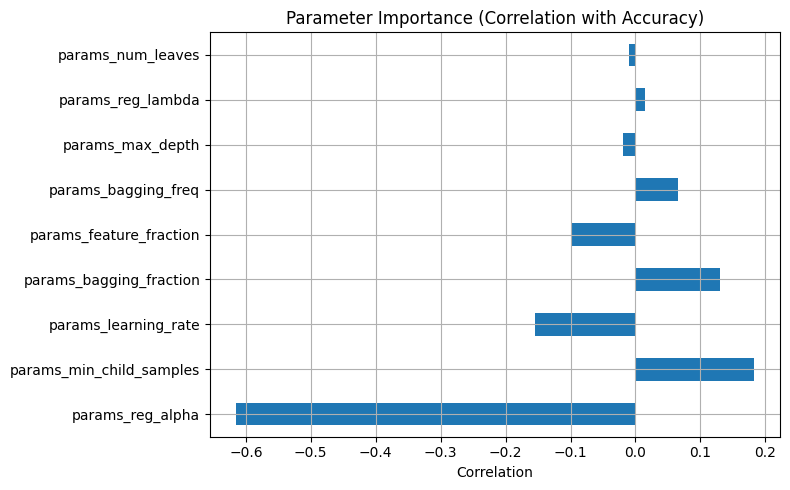

In [6]:
plt.figure(figsize=(8, 5))
correlations.plot(kind="barh")
plt.title("Parameter Importance (Correlation with Accuracy)")
plt.xlabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()